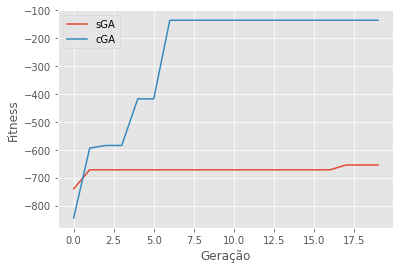

In [1]:
## ALGORITMO GENETICO COMPACTO POP COMPLETA e SIMPLES REAL GERAÇÕES FROSEN
import random
import numpy as np
import array as arr
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm
plt.style.use('ggplot')

progress_cga = []
progress_sga = []

###################          SGA        ###################

def generate_pop_sga(size,population_size):
    pop=[]

    for n in range(population_size):
      value = np.random.normal(0, 1, size )
      pop.append( {'val':value,'fit':0} )
    
    return pop

def crossover_sga(size,population,mutation):
    son = population[0].copy()
    son2 = population[1].copy()

    s = arr.array('f', son['val'])
    s2 = arr.array('f', son2['val'])    
    middle = random.randrange(1,size-1)

    
    son['fit'] = 0
    son2['fit'] = 0
    
    son['val'] = s[:middle] + s2[middle:]
    son2['val'] = s2[:middle] + s[middle:]
    
    # mutation
    child = son['val']
    child2 = son2['val']

    c1 = []
    for c in child:
      mut = random.random()
      if(mut < mutation):
        c1.append(random.random())
      else:
        c1.append(c)
    son['val'] = c1

    c2 = []
    for s in child2:
      mut = random.random()
      if(mut < mutation):
        c2.append(random.random())
      else:
        c2.append(s)
    son2['val'] = c2

    return son,son2

def to_Int(individuo):
  l = []
  for i in individuo:
    if i == "1":
      l.append(1)
    else:
      l.append(0)
  return sum(l)

def run_sga(generations, size, population_size):
    # criação da população aleatoria
    population = generate_pop_sga(size,population_size)
    population = fitness_function_sga(population)

    mutation = 0.01

    # percorre as gerações
    for i in range(generations):

      mid = int(population_size/2) if int(population_size/2) % 2 == 0 else int(population_size/2)-1
      new_population = []
      
      for j in range(0,mid,2):
        new_population += crossover_sga(size,population[j:j+2],mutation)
        #print(j,new_population)

      full_pop = population + new_population
      full_pop = fitness_function_sga(full_pop)

      population = full_pop[:population_size]
      
      #print ("generation: {} and population {}".format(i + 1,population))
      p = population[0]
      progress_sga.append(p['fit'])
  

def sort_fit(e):
  return e['fit']

# funcao de fitness
def fitness_function_sga(population):
  fit = []
  for p in population:
    #print(p['val'])
    soma = 0
    m = p['val']
    for i,v in enumerate(m[:-1]):
      soma+= 100 * pow(pow(v, 2) + m[i + 1], 2) + pow(v - 1, 2)
    p['fit']= soma*-1 
    fit.append(p)

  fit.sort(reverse = True,key=sort_fit)
  
  return fit

###################          CGA        ###################

def generate_candidate(vector,population_size):
    pop=[]

    medias = vector[0]
    desvios = vector[1]
    if medias[0] == 0:
      for n in range(population_size):
        value = np.random.normal(0, 1, len(medias) )
        pop.append( value )
    else:
      for m in range(population_size ):
        value = np.random.normal(medias[m], desvios[m], len(medias) )
        pop.append( value )

    #print(pop)
    
    return pop

def generate_vector(size):
    return [[0.0] * size, [1] * size]

def compete(a, b):
    if a[1] > b[1]:
        return a, b
    else:
        return b, a

def competition(population):
    for n in range(1,len(population)):
      winner,loser = compete(population[0],population[n])
    return winner, loser

def update_vector(vector, winner, loser, population_size,pop,size):
    win = winner[0]
    los = loser[0]
    vM = vector[0]
    vD = vector[1]

    for i in range(size):
      vecMed = []
      for p in pop:
        v = p[0]
        vecMed.append(v[i])
      
      if win[i] != los[i]:
        vM[i] = statistics.mean(vecMed)
        vD[i] = statistics.stdev(vecMed)

def run_cga(generations, size, population_size):
    # probabilidade do vetor
    vector = generate_vector(size)
    best = None
    for i in range(generations):
      population = generate_candidate(vector, population_size)
      population = fitness_function(population)
      population = sortedMax(population)

      winner, loser = competition(population)
      
      # verifica qual é o melhor
      if best:
          if winner[1] > best[1]:
             best = winner
      else:
          best = winner

      update_vector(vector,winner,loser,population_size,population,size)
      
      #print ("generation: {} best value: {} best fitness: {}".format(i + 1, best[0], best[1] ) )
      progress_cga.append(best[1])
     
def sortedMax(pop):
  pop = sorted(pop, key=lambda p: p[1])
  #print(pop)
  return pop

def fitness_function(value):
  pop = []
  #print(value)
  for j, m in enumerate(value[:-1]):
    soma = 0
    for i, u in enumerate(m[:-1]):
      soma+= 100 * pow(pow(u, 2) + m[i + 1], 2) + pow(u - 1, 2)
    pop.append( [m,soma*-1] )
  return pop

def plotgraphics(progress_cga,progress_sga):
  line_sga, = plt.plot(progress_sga, label='sGA')
  line_cga, = plt.plot(progress_cga, label='cGA')
  plt.legend([line_sga, line_cga], ['sGA', 'cGA'])
  plt.xlabel('Geração')
  plt.ylabel('Fitness')
  plt.show()

run_cga(20, 10, 10)
run_sga(20, 10, 10)
plotgraphics(progress_cga,progress_sga)